In [3]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from pathlib import Path

In [4]:
nval_csv = Path('./test/NVAL.csv')
assert nval_csv.exists()

In [23]:
gas_ppm = list()
temperature = list()
time_stamp = list()

with open(nval_csv, 'r') as f:
    reader = csv.DictReader(f)
    for row in reader:
        variable_name = row.get("Name")

        if variable_name == "GAS_PPM":
            gas_ppm.append(float(row.get("Value")))
        elif variable_name == "TEMP":
            temperature.append(float(row.get("Value")))
        else:
            continue
        
        if len(gas_ppm) % 2 == 0:
            time = row.get("TimeBootMS")
            time_second = int(time) / 1000
            time_stamp.append(time_second)

In [24]:
gas_ppm = np.array(gas_ppm)
temperature = np.array(temperature)
time_stamp = np.array(time_stamp)

print(gas_ppm.shape)
print(temperature.shape)
print(time_stamp.shape)

(754,)
(754,)
(754,)


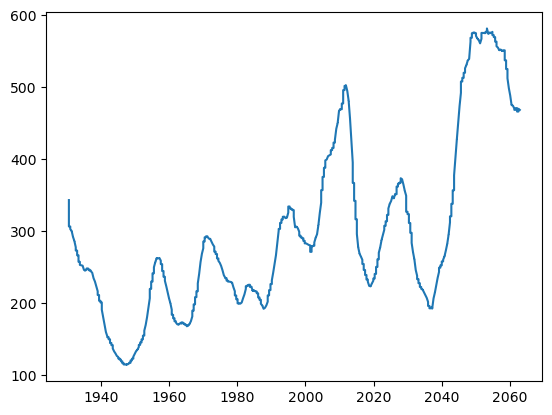

In [26]:
# Plotting only from start time of 1900
start_time = 1900
x_points = time_stamp[time_stamp > start_time]
y_points = gas_ppm[time_stamp > start_time]

plt.plot(x_points, y_points)
plt.show()

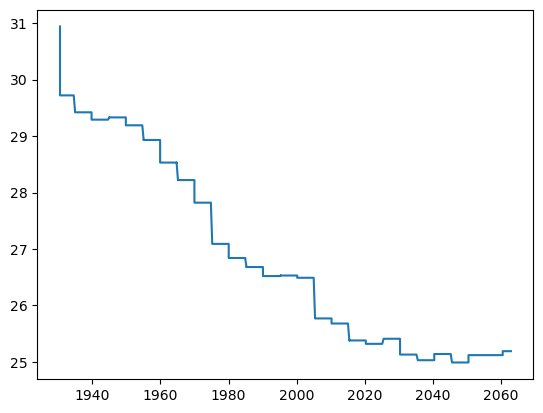

In [27]:
x_points = time_stamp[time_stamp > start_time]
y_points = temperature[time_stamp > start_time]

plt.plot(x_points, y_points)
plt.show()